# Analysis of Seasonal Radio Frequency Signal Strength Variance

## Introduction
This analysis is of radios operated by a Wireless Internet Service Provider (WISP) business in Virginia, USA area. The radio equipment is used by WISP to supply internet service to its subscribers is almost entirely manufactured by Ubiquiti Networks, Inc. [1] The equipment consists of a system ofradio-based stations and access points, operating in the FCC Part 15 unlicensed radio spectrum [2] in the 2.4 and 5.8 GHz frequency ranges.

Between October, 2013 and June, 2016, WISP has been capturing hourly data from each Ubiquiti unit in the network (4032 distinct units are included in the analysis). This report is a summary and analysis of the data collected over a 988 day period.

## Methods
The data for this study were collected from the Ubiquiti AirControl centralized device management program [3]. The data were collected hourly for each device under management by the AirControl program, using the AirControl application programming interface (api) and the Python programming language [4], and stored in a MongoDB version 2.4.10 database [5].

The data were extracted from the database and processed using Python programs. The data were not significantly altered; records in which signal strength was recorded as 0.00 dBm or -96.00 dBm were discarded as these figures indicate that the radio is not active. Unavailable dewpoints, recorded as -9999.0 were also discarded.

Statistical analyses were performed and plots were produced using the R programming language [6].

## Analysis and Discussion

Of the data collected from each radio unit, we are primarily interested in the signal strength (dBm) [7] received by each unit from its corresponding access point (AP). This is a good indicator of data throughput performance and data link reliability. A plot was produced of the mean signal strength for all radios for each hour from 14:01 on October 2, 2013 to 16:01 on June 24, 2015 (all times UCT – 5), and is shown in Figure 1.

In [21]:
sigs <- read.csv('signals.csv', header=T, stringsAsFactors=F)
names(sigs) <- c('date', 'signal')
sigs$date <- as.Date(sigs$date)
dewpts <- read.csv('dewpoints.csv')
names(dewpts) <- c('date', 'dewpoint')
dewpts$date <- as.Date(dewpts$date)

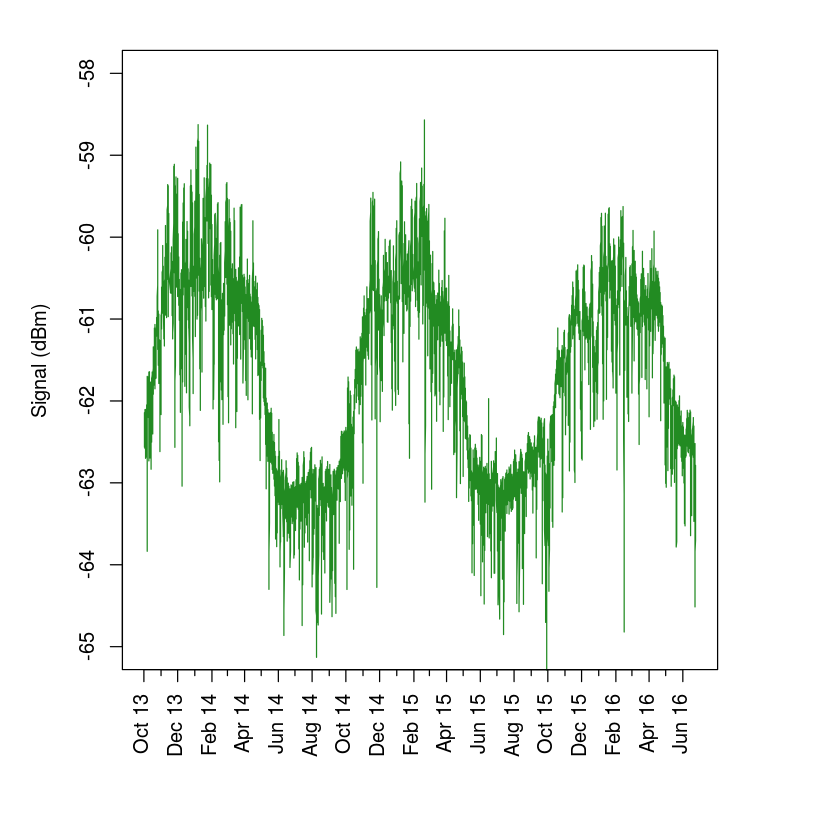

In [27]:
par(mar = c(7,5,2,5) + 0.1)
with(sigs, plot(date, signal, type="l", col="forestgreen", 
             ylab='Signal (dBm)',
             ylim=c(-65, -58), xaxt="n", ann=FALSE))
labDates <- seq(as.Date("01/10/2013", format = "%d/%m/%Y"), tail(sigs$date, 1),
                by = "2 months")
## new dates for minor ticks
minor <- seq(as.Date("01/11/2013", format = "%d/%m/%Y"), tail(sigs$date, 1),
             by = "2 months")
axis.Date(side = 1, sigs$dates, at = labDates, format = "%b %y", las = 2)
## add minor ticks with no labels, shorter tick length
axis.Date(side = 1, sigs$date, at = minor, labels = FALSE, tcl = -0.25)
title(ylab = "Signal (dBm)") ## draw the axis labels

There is a distinct pattern to the variability in mean signal strength, peaking near the beginning of each year (beginning of Winter in the Northern Hemisphere), and reaching a minimum near the middle of each year (beginning of Summer in the Northern Hemisphere). An analysis of the 4032 radios that were active in the network
on both Jan 1 and July 1 of 2014, 2015, and 2016 showed that 78% experienced a median decrease in signal
strength of 3.39 dBm, and 22% experienced a median increase in signal strength of 1.8 dBm.
A similar plot of mean hourly noise figure across all radios was produced, and is shown in Figure 2.
The noise plot (dBm) exhibits the same pattern as the signal strength plot: a marked decrease
between March and July, followed by a slight increase from July to September.

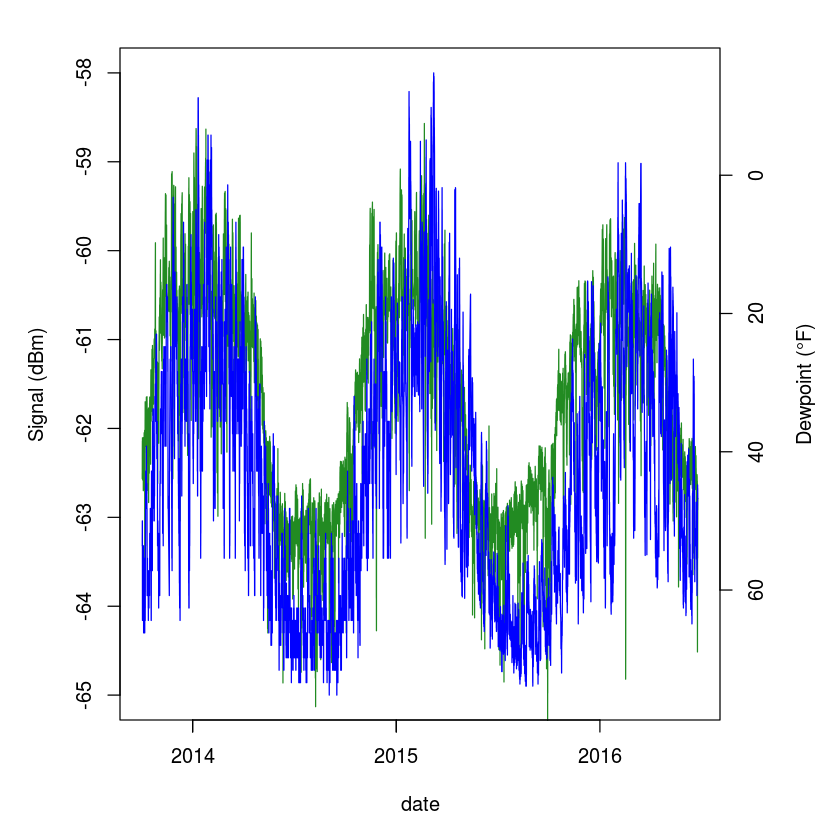

In [19]:
par(mar = c(5,5,2,5))
with(sigs, plot(date, signal, type="l", col="forestgreen", 
             ylab='Signal (dBm)',
             ylim=c(-65, -58)))
par(new = T)
with(dewpts, plot(date, dewpoint, type="l", col="blue", axes=F, xlab=NA, ylab=NA, cex=1.2, ylim=rev(range(dewpoint))))
axis(side = 4)
mtext(side = 4, line = 3, 'Dewpoint (°F)')